In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
#get data
df = pd.read_csv('train.csv')
dftest =pd.read_csv('test.csv')


In [3]:
df.head() #checking how the train data looks

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dftest.head(10) #show first 10 rows of test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [5]:
dftest.isna().sum() #check the missing values in test data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [6]:
df.isna().sum()  #check the missing values in train data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.info() #check the informations about the columns in train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
dftest.info() #check the informations about the columns in test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
df.describe() #check the summery of the train dataset

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
dftest.describe() #check the summery of the test dataset

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [11]:
df.corr() #check the correlation in train dataset

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


### Feature Engineering

In [12]:
df['datetime']=pd.to_datetime(df['datetime']) #Convert to datetime
df.set_index(pd.to_datetime(df['datetime']), inplace= True) #set it as an index
df.drop(['datetime'],axis =1,inplace=True) #drop the previous column called datetime as we do not need one anymore
df.info() #check the information again of the columns
#we do not have datetime column here anymore as we have datetime index now


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [13]:
def split_the_datetime(df):     #split datetime into years,months,weeks,weekdays,weekends,days,and times(hours)
    df['year'] = df.index.year
    df['month'] = df.index.month    
    df['week'] = df.index.isocalendar().week
    df['weekday'] =df.index.weekday
    df['weekend'] = (df.weekday >= 5).astype(int)
    df['day'] = df.index.day
    df['time']=df.index
    df['time']=df['time'].astype(np.int64)//1000000000000
    df['hour'] = df.index.hour
    
split_the_datetime(df)

<ipython-input-13-d26cd3288567>:9: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['time']=df['time'].astype(np.int64)//1000000000000


In [14]:
def season_clarification(df): #namethe seasons
    df['season']=df['season'].astype(int)
    df['season']=df['season'].replace(['1','2','3','4'],value=['Spring','Summer','Fall','Winter'])
    return df

In [15]:
def weather_clarification(df):  #name the weathers
    df['weather']=df['weather'].astype(int)
    df['weather']=df['weather'].replace(['1','2','3','4'],value=['Clear','Mist ','Light Snow, Light Rain ','Heavy Rain '])
    return df

In [16]:
df.head() #chech again how the dataframe looks now

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,week,weekday,weekend,day,time,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,52,5,1,1,1293840,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,52,5,1,1,1293843,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,52,5,1,1,1293847,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,52,5,1,1,1293850,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,52,5,1,1,1293854,4


### Exploratory Data Analysis

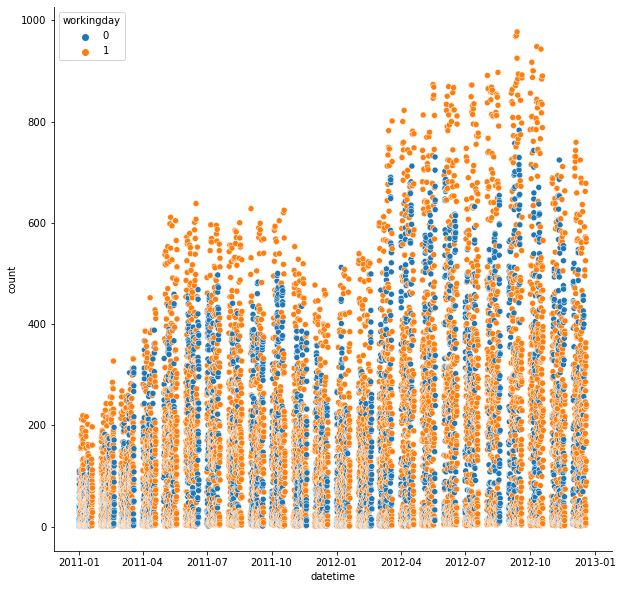

In [17]:
#checking how many bikes are rented out per year on working days and non-working days
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df.index, y='count', hue='workingday', data=df)
sns.despine()


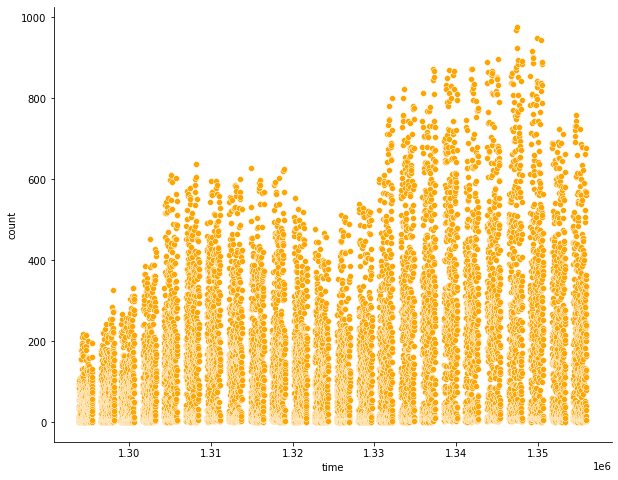

In [18]:
#checking how many bikes there are during the whole time 
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='time', y='count', color='orange')
sns.despine()

In [19]:
# selecting number of features out of big df
count_h_d=df.groupby(['hour','weekday'])['count'].mean().reset_index()
count_h_d['weekday']=count_h_d['weekday'].astype(str)
count_h_d['weekday']=count_h_d['weekday'].replace(['0','1','2','3','4','5','6'], 
                                                              value=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
count_h_d.head(15)

,hour,weekday,count
0,0,Sun,35.492308
1,0,Mon,27.328125
2,0,Tue,36.246154
3,0,Wed,37.476923
4,0,Thu,53.234375
5,0,Fri,98.212121
6,0,Sat,96.227273
7,1,Sun,18.076923
8,1,Mon,11.904762
9,1,Tue,15.615385


[Text(0.5, 1.0, 'Total count of bikes rented during each hour'),
 Text(0, 0.5, 'Amount of bikes rented'),
 Text(0.5, 0, 'Hours')]

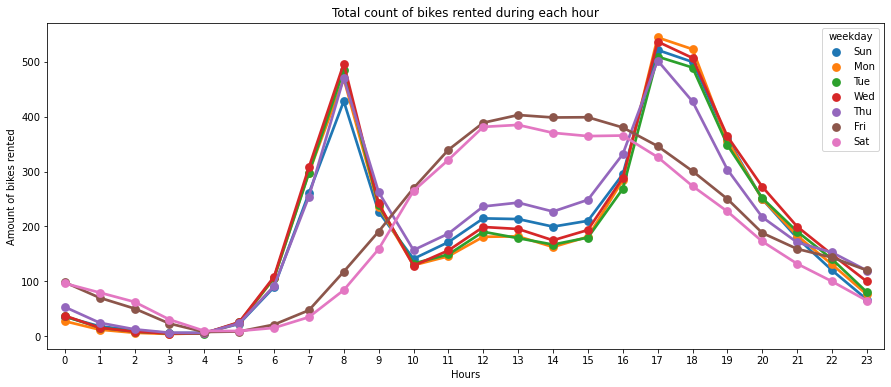

In [20]:
#ploting the Total count of bikes rented duriung each hour (per day)
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x='hour', y='count', hue='weekday', data=count_h_d, alpha=0.6).set(title='Total count of bikes rented during each hour', ylabel='Amount of bikes rented', xlabel= 'Hours')

In [21]:
#### How much of an impact does weather have on demand? #########


count_w_w=df.groupby(['weather','weekday'])['count'].mean().reset_index()
count_w_w['weekday']=count_w_w['weekday'].astype(str)
count_w_w['weekday']=count_w_w['weekday'].replace(['0','1','2','3','4','5','6'], 
                                                              value=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
count_w_w['weather']=count_w_w['weather'].astype(str)
count_w_w['weather']=count_w_w['weather'].replace(['1','2','3','4'],value=['Clear','Mist ','Light Snow, Light Rain ','Heavy Rain '])
count_w_w.head()


,weather,weekday,count
0,Clear,Sun,184.880157
1,Clear,Mon,211.283516
2,Clear,Tue,204.464323
3,Clear,Wed,214.443934
4,Clear,Thu,210.848113


[Text(0.5, 1.0, 'Total count of bikes rented during each day'),
 Text(0, 0.5, 'Amount of bikes rented'),
 Text(0.5, 0, 'Weather')]

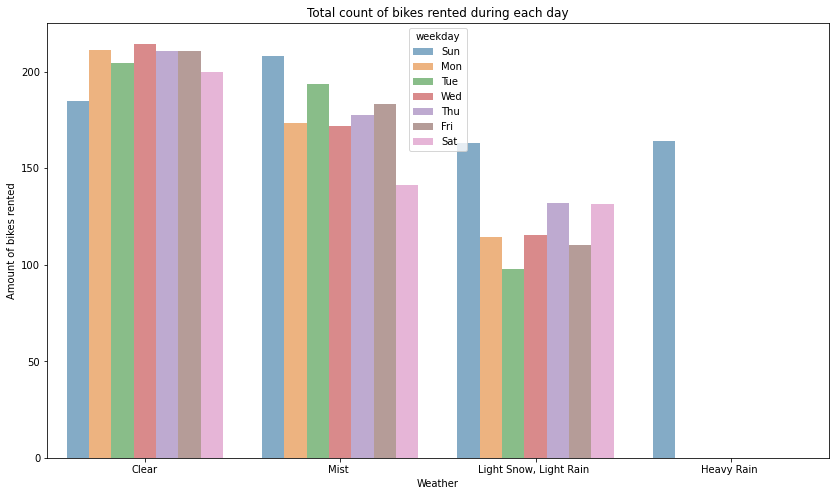

In [22]:
#plotting tghe total count of bikes render during each day in different weathers
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x='weather', y='count', hue='weekday', data=count_w_w, alpha=0.6).set(title='Total count of bikes rented during each day', ylabel='Amount of bikes rented', xlabel= 'Weather')


<function matplotlib.pyplot.show(close=None, block=None)>

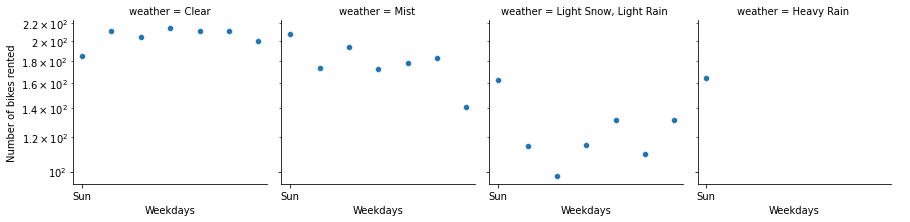

In [23]:
#splitting the data according to weather
grid = sns.FacetGrid(data=count_w_w, col='weather',  palette=['#FFADB9'] )
grid.map_dataframe(sns.scatterplot, y='count', x='weekday')
grid.add_legend()
plt.yscale("log")
grid.set_xlabels("Weekdays")
grid.set_ylabels("Number of bikes rented")
sns.despine()
plt.show

In [24]:
#### How does the behavior of casual users differ from subscribers? ####
casual=df['casual']
registered=df['registered']
weekday=df['weekday']
hour=df['hour']
season=df['season']
weather=df['weather']
month=df['month']
time=df['time']
concat1= pd.concat([casual,time,registered, weekday,month,hour,season,weather],axis=1)
concat1


,casual,time,registered,weekday,month,hour,season,weather
datetime,,,,,,,,
2011-01-01 00:00:00,3,1293840,13,5,1,0,1,1
2011-01-01 01:00:00,8,1293843,32,5,1,1,1,1
2011-01-01 02:00:00,5,1293847,27,5,1,2,1,1
2011-01-01 03:00:00,3,1293850,10,5,1,3,1,1
2011-01-01 04:00:00,0,1293854,1,5,1,4,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,7,1355943,329,2,12,19,4,1
2012-12-19 20:00:00,10,1355947,231,2,12,20,4,1
2012-12-19 21:00:00,4,1355950,164,2,12,21,4,1


In [25]:
casual.value_counts(), registered.value_counts() #check value counts of registered and casual users of the bicycle renting 

(0      986
 1      667
 2      487
 3      438
 4      354
       ... 
 332      1
 361      1
 356      1
 331      1
 304      1
 Name: casual, Length: 309, dtype: int64,
 3      195
 4      190
 5      177
 6      155
 2      150
       ... 
 570      1
 422      1
 678      1
 565      1
 636      1
 Name: registered, Length: 731, dtype: int64)

In [26]:
#finding a correlation between the casual and registered users
concat1['casual'].corr(concat1['registered'])

0.497249685087008

<AxesSubplot:xlabel='casual', ylabel='season'>

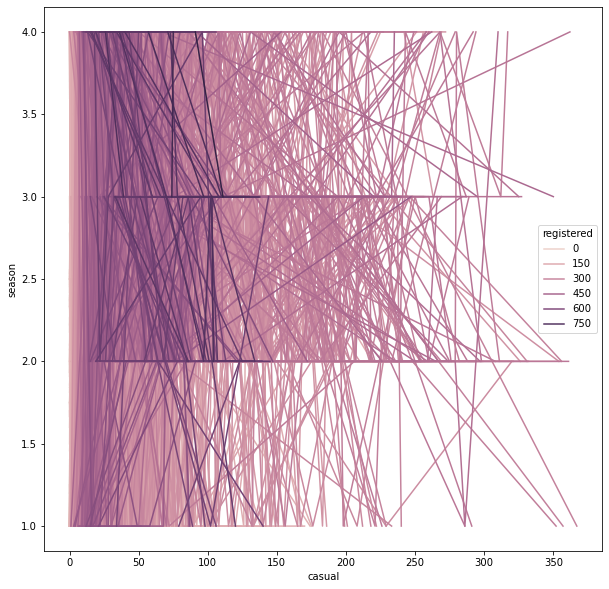

In [27]:
#plotting the data of casual and registered users in different seasons
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(x='casual', y='season', hue='registered', data=concat1)

<AxesSubplot:>

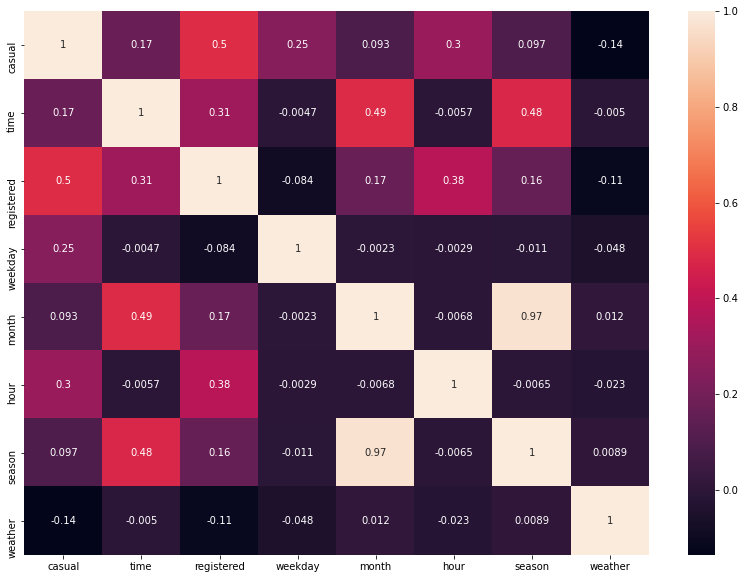

In [28]:
#checking the correlation between the casual and registered users on a heatmap

fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(concat1.corr(),annot=True)

In [29]:
#selecting the other variables that might have had an infuence on the casual and registered users behaviours 

count_c_r=concat1.groupby(['time','weekday', 'hour','month','registered','season','weather'])['casual'].mean().reset_index()
count_c_r['weekday']=count_c_r['weekday'].astype(str)
count_c_r['weekday']=count_c_r['weekday'].replace([' 0','1','2','3','4','5','6'],value=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
count_c_r['season']=count_c_r['season'].astype(str)
count_c_r['season']=count_c_r['season'].replace(['1','2','3','4'],value=['Spring','Summer','Fall','Winter'])
count_c_r['weather']=count_c_r['weather'].astype(str)
count_c_r['weather']=count_c_r['weather'].replace(['1','2','3','4'],value=['Clear','Mist ','Light Snow, Light Rain ','Heavy Rain '])


count_c_r.head()

,time,weekday,hour,month,registered,season,weather,casual
0,1293840,Fri,0,1,13,Spring,Clear,3.0
1,1293843,Fri,1,1,32,Spring,Clear,8.0
2,1293847,Fri,2,1,27,Spring,Clear,5.0
3,1293850,Fri,3,1,10,Spring,Clear,3.0
4,1293854,Fri,4,1,1,Spring,Clear,0.0


[Text(0.5, 1.0, 'How does the behavior of casual users differ from subscribers?'),
 Text(0, 0.5, 'Casual Users'),
 Text(0.5, 0, 'Subscribers')]

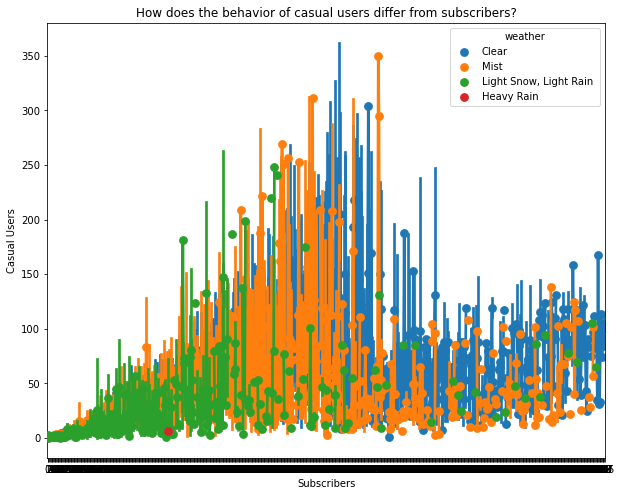

In [30]:
#checking how the behaviour of registered users differ from the casual ones in different weathers 
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(x='registered', y='casual', hue='weather', data=count_c_r, alpha=0.6).set(title='How does the behavior of casual users differ from subscribers?', ylabel='Casual Users', xlabel= 'Subscribers')


<function matplotlib.pyplot.show(close=None, block=None)>

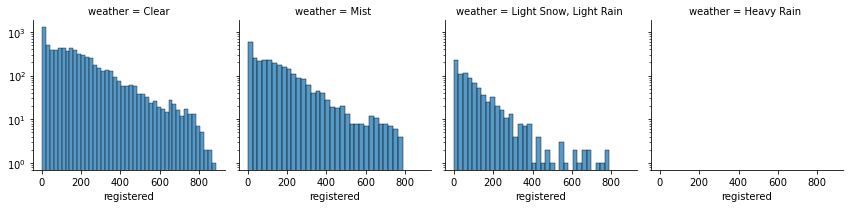

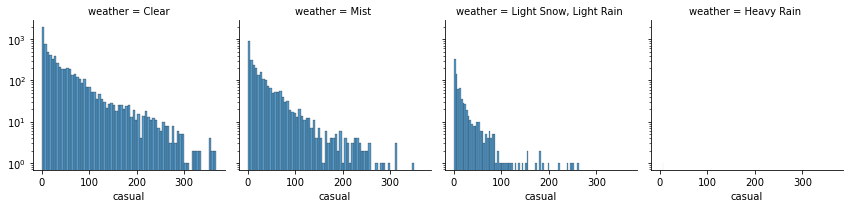

In [31]:
##checking how the behaviour of registered users differ from the casual ones in different weathers (separate plots for each weather  )
g= sns.FacetGrid(count_c_r, col='weather')
g.map(sns.histplot, 'registered')
plt.yscale("log")
g= sns.FacetGrid(count_c_r, col='weather')
g.map(sns.histplot, 'casual')
plt.yscale("log")
plt.yscale("log")
plt.show


<AxesSubplot:xlabel='year', ylabel='count'>

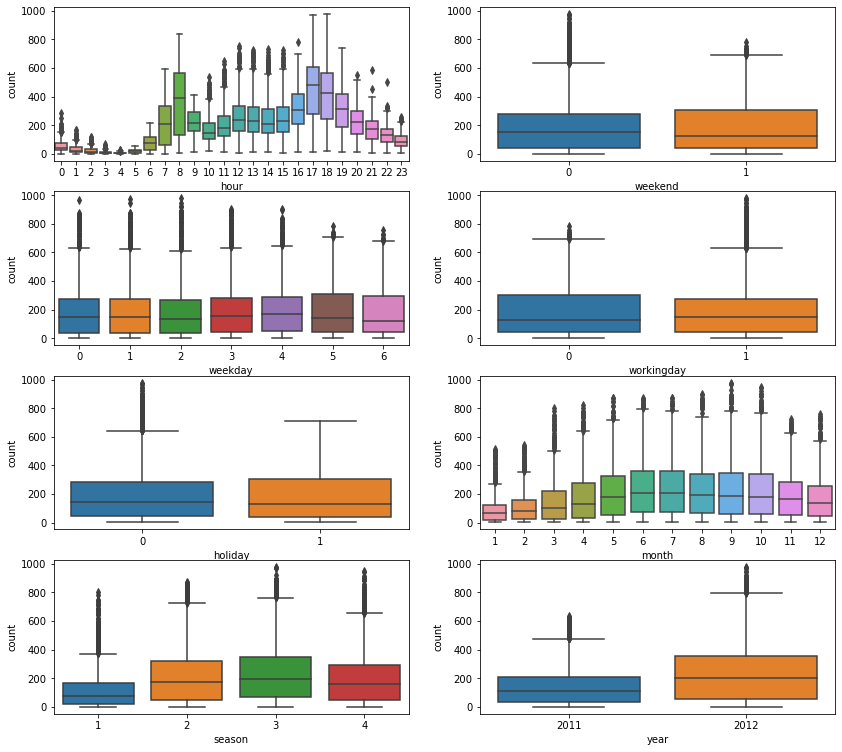

In [32]:
#checking categorical features

fig,axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(14, 13)
sns.boxplot(x='hour',y='count', data=df, ax=axes[0][0])
sns.boxplot(x='weekend',y='count', data=df,ax=axes[0][1])
sns.boxplot(x='weekday',y='count', data=df,ax=axes[1][0])
sns.boxplot(x='workingday',y='count', data=df,ax=axes[1][1])
sns.boxplot(x='holiday',y='count', data=df,ax=axes[2][0])
sns.boxplot(x='month',y='count', data=df,ax=axes[2][1])
sns.boxplot(x='season',y='count', data=df,ax=axes[3][0])
sns.boxplot(x='year',y='count', data=df,ax=axes[3][1])


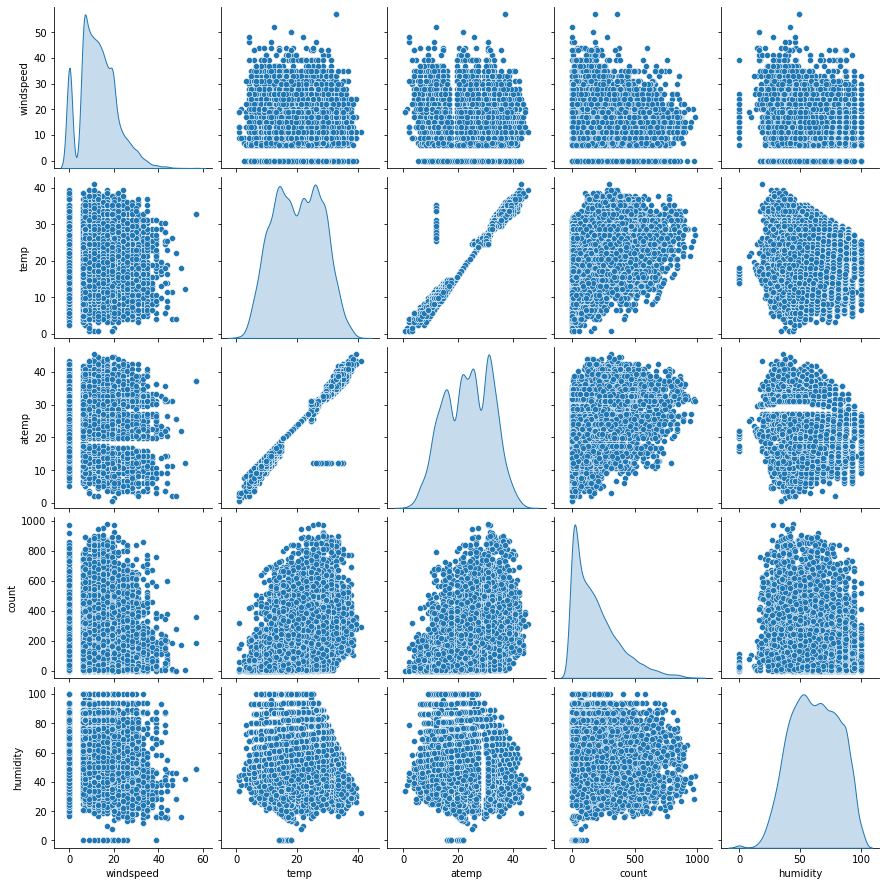

In [33]:
#checking a correlation between numerical features
sel=df[[ 'windspeed','temp', 'atemp', 'count','humidity']]

sns.pairplot(sel, diag_kind='kde')
plt.show()

### Manual Feature Engineering

In [34]:
#drop the columns of casual and registered as they are already included in Count column
df.drop('casual',axis =1,inplace=True)
df.drop('registered',axis =1,inplace=True)

In [35]:
#checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  week        10886 non-null  UInt32 
 12  weekday     10886 non-null  int64  
 13  weekend     10886 non-null  int32  
 14  day         10886 non-null  int64  
 15  time        10886 non-null  int64  
 16  hour        10886 non-null  int64  
dtypes: UInt32(1), float64(3), int32(1), int64(12)
memory usage: 1.4 MB


In [36]:
df_new=df.copy() #save the df dataset with a new name for tne further use

df=pd.get_dummies(df, columns=['weather', 'season','hour'], drop_first=True)

In [37]:
sel=['temp', 'humidity', 'windspeed']
scaler=MinMaxScaler()
df[sel]=scaler.fit_transform(df[sel])

In [38]:
X=df.drop(['count'], axis=1)
y=df['count']
y_log = np.log1p(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state=42)

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape #check the shapes of the X and y train and test

((8164, 42), (8164,), (2722, 42), (2722,))

In [41]:
y_test.describe() #check the summery of y test 


count    2722.000000
mean        4.602379
std         1.414658
min         0.693147
25%         3.806662
50%         4.990433
75%         5.641019
max         6.885510
Name: count, dtype: float64

In [43]:
X = X.transpose() 

### Linear Regression 

In [44]:
#Training a regression model
m=LinearRegression()
m.fit(X_train,y_train)

LinearRegression()

In [45]:
m.score(X_train, y_train)

0.8324864056208334

In [46]:
y_pred_train=m.predict(X_train)
y_pred_test=m.predict(X_test)


In [47]:
y_pred_train.shape, y_test.shape, y_pred_test.shape

((8164,), (2722,), (2722,))

In [48]:
MSLE=mean_squared_log_error

In [49]:
#calculating msle for train data
mse = np.sqrt(MSLE((np.exp(y_train)-1), (np.exp(y_pred_train)-1)))
print('\nMean Sqaured Logarithmic Error = ', mse.mean() )


Mean Sqaured Logarithmic Error =  0.5816052308502132


In [50]:
#calculating msle for test data
mset=np.sqrt(MSLE((np.exp(y_test)-1), (np.exp(y_pred_test)-1)))
print('\nMean Sqaured Logarithmic Error = ', mse.mean() )


Mean Sqaured Logarithmic Error =  0.5816052308502132


In [51]:
#calculatin r2 for train 
r2_score(y_train,y_pred_train)

0.8324864056208334

In [52]:
##calculatin r2 for test
r2_score(y_test,y_pred_test)

0.8322966362632553

In [53]:
# calculating coefficients
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(m.coef_)
coeff

,0,Coefficient Estimate
0,holiday,0.056810
1,workingday,-0.008420
2,temp,0.419311
3,atemp,0.019977
4,humidity,-0.254558
5,windspeed,-0.212231
6,year,16.494729
7,month,1.435297
8,week,-0.011780
9,weekday,0.033195


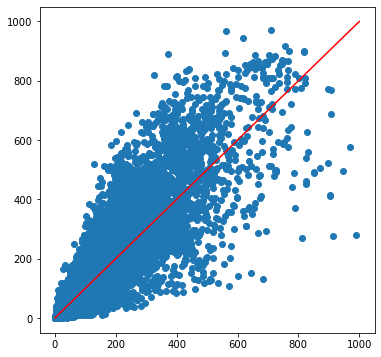

In [54]:
plt.figure(figsize=(6, 6))
plt.scatter(np.exp(y_pred_train)-1, (np.exp(y_train)-1))
plt.plot( [0,1000],[0,1000], color='red')

### Cross validate the model and intepret the results

In [55]:
cv=cross_val_score(m, X_train, y_train, cv=5, scoring='r2')
cv_mean = cv.mean()
cv_std = np.std(cv)
print('Cross-validation mean:', cv.mean())


Cross-validation mean: 0.8295497741034303


<AxesSubplot:>

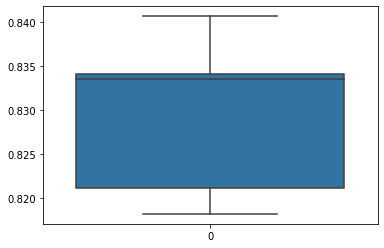

In [56]:
# Lets visualise a distribution of the results
sns.boxplot(data=cv)

In [57]:
m.fit(X_train, y_train)
train_score = m.score(X_train, y_train)
train_score

0.8324864056208334

In [58]:
# Is the score inside the range?
train_score > cv.min() and train_score < cv.max()

True

In [59]:
# Is the score is inside one sigma?
train_score - cv_mean < cv_std

True

In [60]:
test_score = m.score(X_test, y_test)
test_score

0.8322966362632553

### RMSLE

In [61]:
def rmslr(y_true, y_pred, **kwargs):
   return mean_squared_log_error(y_true, y_pred, **kwargs)**0.5

In [62]:
from sklearn.metrics import make_scorer, mean_squared_log_error
#RandomForestRegressor for checking the feature importances
rf = RandomForestRegressor()

param = {'n_estimators':[1,10,100,1000]}
rmslr_s = make_scorer(rmslr, greater_is_better=False)
gs = GridSearchCV(rf, param, scoring = rmslr_s)

gs.fit(X_train,y_train)
y_pred_train=gs.predict(X_train)
y_pred_test=gs.predict(X_test)

print (gs.best_params_)
print ("RMSLE train: ", rmslr((np.exp(y_train)-1), (np.exp(y_pred_train)-1)))
print ("RMSLE test: ", rmslr((np.exp(y_test)-1), (np.exp(y_pred_test)-1)))
print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))

{'n_estimators': 1000}
RMSLE train:  0.15212683498497953
RMSLE test:  0.3952730347274555
r_2 score train : 0.988539459256577
r_2 score test : 0.9219000149201703


In [63]:
rfm =  RandomForestRegressor(n_estimators=100) #get the random forest model with the number of estimators (100)
rfm.fit(X_train, y_train) #fit the model
fi=rfm.feature_importances_
fi

array([9.00576565e-04, 4.11409678e-02, 2.74450220e-02, 2.27515596e-02,
       3.25431463e-02, 1.14826464e-02, 2.58372261e-04, 3.49216798e-03,
       9.84805320e-03, 2.61596246e-02, 1.52944734e-02, 1.05362424e-02,
       1.01900866e-01, 1.96096110e-03, 7.06886763e-03, 4.01678280e-06,
       6.56869216e-04, 6.54594873e-04, 2.79799145e-04, 8.44926390e-02,
       1.04438009e-01, 1.34639885e-01, 1.59599492e-01, 9.83428184e-02,
       2.47137000e-02, 8.38750126e-03, 1.12587507e-02, 3.65394603e-03,
       1.92259265e-03, 1.14720988e-03, 1.08998861e-03, 9.20983190e-04,
       8.84708050e-04, 8.11241618e-04, 2.98473067e-03, 1.11209326e-02,
       9.97980417e-03, 5.12962331e-03, 2.70852808e-03, 2.11480375e-03,
       2.94952348e-03, 1.23297615e-02])

### Ridge

In [64]:
ridge= Ridge() #regularization of coefficients 
par1 = {'alpha': [0.1,0.4,0.6,0.8,1,4,5,10] }

rmslr_s= make_scorer(rmslr, greater_is_better=False)

grid1 = GridSearchCV(ridge,par1,scoring = rmslr_s)

grid1.fit(X_train, y_train)

y_pred_train_ridge=grid1.predict(X_train)
y_pred_test_ridge=grid1.predict(X_test)
best1=grid1.best_estimator_
print (grid1.best_params_)
print ("Best parameter:", best1)
print ("RMSLE train: ", rmslr((np.exp(y_train)-1), (np.exp(y_pred_train_ridge)-1)))
print ("RMSLE test: ", rmslr((np.exp(y_test)-1), (np.exp(y_pred_test_ridge)-1)))
print('r_2 score train :',r2_score(y_train,y_pred_train_ridge))
print('r_2 score test :',r2_score(y_test,y_pred_test_ridge))

{'alpha': 0.1}
Best parameter: Ridge(alpha=0.1)
RMSLE train:  0.5819334453084464
RMSLE test:  0.5797448818128756
r_2 score train : 0.8322972880059454
r_2 score test : 0.8319918223134221


### Lasso

In [65]:
lasso = Lasso() #using lasso for regularization of coefficients (pushing them down to zero)
alpha=[0.1,1,0.0001,0.001,0.00001,0.005,0.05,5,0.000001]

par2 = { 'max_iter':[5000],'alpha':alpha}
grid2 = GridSearchCV(lasso,par2,scoring = rmslr_s,cv=10)

grid2.fit(X_train,y_train)
y_pred_train_lasso=grid2.predict(X_train)
y_pred_test_lasso=grid2.predict(X_test)
best2=grid2.best_estimator_
print (grid2.best_params_)
print("Best parameter:",best2)
print ("RMSLE train: ", rmslr((np.exp(y_train)-1), (np.exp(y_pred_train_lasso)-1)))
print ("RMSLE test: ", rmslr((np.exp(y_test)-1), (np.exp(y_pred_test_lasso)-1)))
print('r_2 score train :',r2_score(y_train,y_pred_train_lasso))
print('r_2 score test :',r2_score(y_test,y_pred_test_lasso))

C:\Users\49178\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1135.0332565753317, tolerance: 1.4839019198139507
  model = cd_fast.enet_coordinate_descent(
C:\Users\49178\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1090.6196487814072, tolerance: 1.4819725624901654
  model = cd_fast.enet_coordinate_descent(
C:\Users\49178\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1154.1294153762608, tolerance: 1.4828128088536738
  model = cd_fast.enet_coordinate_descent(
C:\Users\49178\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

{'alpha': 1e-06, 'max_iter': 5000}
Best parameter: Lasso(alpha=1e-06, max_iter=5000)
RMSLE train:  0.5819964803003687
RMSLE test:  0.5798355247574306
r_2 score train : 0.8322609549451334
r_2 score test : 0.831939282146468


C:\Users\49178\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1374.884203540872, tolerance: 1.6485781756162212
  model = cd_fast.enet_coordinate_descent(


### Polynomial Features

In [66]:
df_new.tail()# check the end of the dataset


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,week,weekday,weekend,day,time,hour
datetime,,,,,,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,51,2,0,19,1355943,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,51,2,0,19,1355947,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,51,2,0,19,1355950,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,51,2,0,19,1355954,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,88,2012,12,51,2,0,19,1355958,23


In [67]:
### Making a model complex
pol= PolynomialFeatures(degree=4) #transformative model
m = LinearRegression() 
X=df_new.drop(['count'], axis=1)
y=df_new['count']
y_log = np.log1p(y)
X = pol.fit_transform(X).astype(int)

X[:5]


array([[          1,           1,           0, ...,           0,
                  0,           0],
       [          1,           1,           0, ..., -2147483648,
            1293843,           1],
       [          1,           1,           0, ..., -2147483648,
           10350776,          16],
       [          1,           1,           0, ..., -2147483648,
           34933950,          81],
       [          1,           1,           0, ..., -2147483648,
           82806656,         256]])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state=42) #split the data, without this step X and y shapes 
#were too different from each other for fitting in next steps

In [69]:
X_train.shape #check the shape again

(8164, 4845)

In [79]:
y_train.shape #check the shape again

(8164,)

### Compare

In [80]:
### Reduce the complexity through regularization

m_ridge = Ridge(alpha=50) # alpha: regularization strength aka as lambda sometimes
m_lasso = Lasso(alpha=50)

m.fit(X_train, y_train)        #Train the linear model
m_ridge.fit(X_train, y_train)  #Train the linear model with ridge regularization
m_lasso.fit(X_train, y_train)  #Train the linear model with lasso regularization

C:\Users\49178\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1344.1552263332574, tolerance: 1.6485781756162212
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50)

In [81]:
ypred = m.predict(X_train)
ypred_ridge = m_ridge.predict(X_train)
ypred_lasso = m_lasso.predict(X_train)
ypred, ypred_ridge, ypred_lasso

(array([3.66796875, 5.59375   , 3.57421875, ..., 6.00976562, 3.11523438,
        5.53125   ]),
 array([3.69296254, 5.69548742, 3.77928721, ..., 5.81921586, 3.21701041,
        5.46754022]),
 array([3.68930848, 5.60548601, 4.08911986, ..., 5.22035342, 3.26212781,
        5.15130327]))

In [82]:
m.coef_ #Linear Regression coefficients without Regularization

array([-3.53537960e-04, -9.50233077e+01, -4.87527464e+01, ...,
       -8.38430048e+00,  7.32534033e-11,  7.76881529e-05])

In [83]:
m_ridge.coef_ #Linear Regression coefficients WITH Ridge Regularization

array([-1.08278569e-07,  9.83060822e-07, -6.72205521e-07, ...,
        8.47462194e-07,  7.91877483e-11,  7.62208879e-05])

In [84]:

m_lasso.coef_ #Linear Regression coefficients WITH Lasso Regularization.

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
       -8.61144650e-26,  9.42060244e-11, -5.76494283e-06])

In [96]:
plt.plot(X_train, ypred)
plt.plot(X_train, ypred_ridge)
plt.plot(X_train, ypred_lasso)

plt.legend(['No regularization', 'Ridge Regularization', 'Lasso Regularization'])
sns.despine()
plt.show()

C:\Users\49178\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x000001E6260C21F0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.plot(X_train, ypred, 'c')
plt.plot(X_train, ypred_ridge, 'y')
plt.plot(X_train, ypred_lasso,'r')

plt.show()